## Module 6 - Classification Exercises

We saw why linear regression is not an ideal choice for classification. We audited some of the classification algorithms logistic regression, LDA and SVM which are widely used for data analysis. 

Apply this classification algorithms you came across in lab and practice notebooks on songs and glass datasets. The songs dataset captures details about a song year when it is released, title, artist name, loudness pitch, tempo, timbre values etc. All this independent values are used to predict if the song has made it to the top 10 list. Apply a logistic regression model to this dataset.

Reading the data from dataset located at /datasets/songs/songs.csv

In [55]:
songs_data = read.csv("../../datasets/songs/songs.csv")
head(songs_data)

year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,⋯,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,⋯,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,⋯,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,⋯,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,⋯,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0
2010,Better Off This Way,A Day to Remember,SOCEYON1315CD4A23E,AROBSHL1187B9AFB01,4,1.000,-3.807,160.366,0.347,⋯,91.117,-54.378,53.808,-33.183,54.657,-64.478,34.522,-40.922,36.453,0


In [56]:
str(songs_data)
table(songs_data$year)

'data.frame':	7574 obs. of  39 variables:
 $ year                    : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ songtitle               : Factor w/ 7141 levels "̈́ l'or_e des bois",..: 6204 5522 241 3115 48 608 255 4419 2886 6756 ...
 $ artistname              : Factor w/ 1032 levels "50 Cent","98 Degrees",..: 3 3 3 3 3 3 3 3 3 12 ...
 $ songID                  : Factor w/ 7549 levels "SOAACNI1315CD4AC42",..: 595 5439 5252 1716 3431 1020 1831 3964 6904 2473 ...
 $ artistID                : Factor w/ 1047 levels "AR00B1I1187FB433EB",..: 671 671 671 671 671 671 671 671 671 507 ...
 $ timesignature           : int  3 4 4 4 4 4 4 4 4 4 ...
 $ timesignature_confidence: num  0.853 1 1 1 0.788 1 0.968 0.861 0.622 0.938 ...
 $ loudness                : num  -4.26 -4.05 -3.57 -3.81 -4.71 ...
 $ tempo                   : num  91.5 140 160.5 97.5 140.1 ...
 $ tempo_confidence        : num  0.953 0.921 0.489 0.794 0.286 0.347 0.273 0.83 0.018 0.929 ...
 $ key                   


1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 
 328  196  186  324  198  258  178  329  380  357  363  282  518  434  479  392 
2006 2007 2008 2009 2010 
 479  622  415  483  373 

**Activity 1: ** Split the songs_data dataframe into train and test sets. Use subset function to create songs_traindata and songs_testdata subsets. songs_traindata should contain songs with year less than or equal to (<=) 2009 and songs_testdata should contain songs from year 2010.

In [57]:
songs_traindata = subset(songs_data, year <= 2009)
songs_testdata = subset(songs_data, year > 2009)


**Activity 2: ** Remove the following independent variables ("year", "songtitle", "artistname", "songID", and "artistID") from songs_traindata and songs_testdata.

In [58]:
# Your code for Activity 2 goes here
songs_traindata = subset( songs_traindata, select = -c(year,songtitle,artistname,songID,artistID))
songs_testdata = subset( songs_testdata, select = -c(year,songtitle,artistname,songID,artistID))

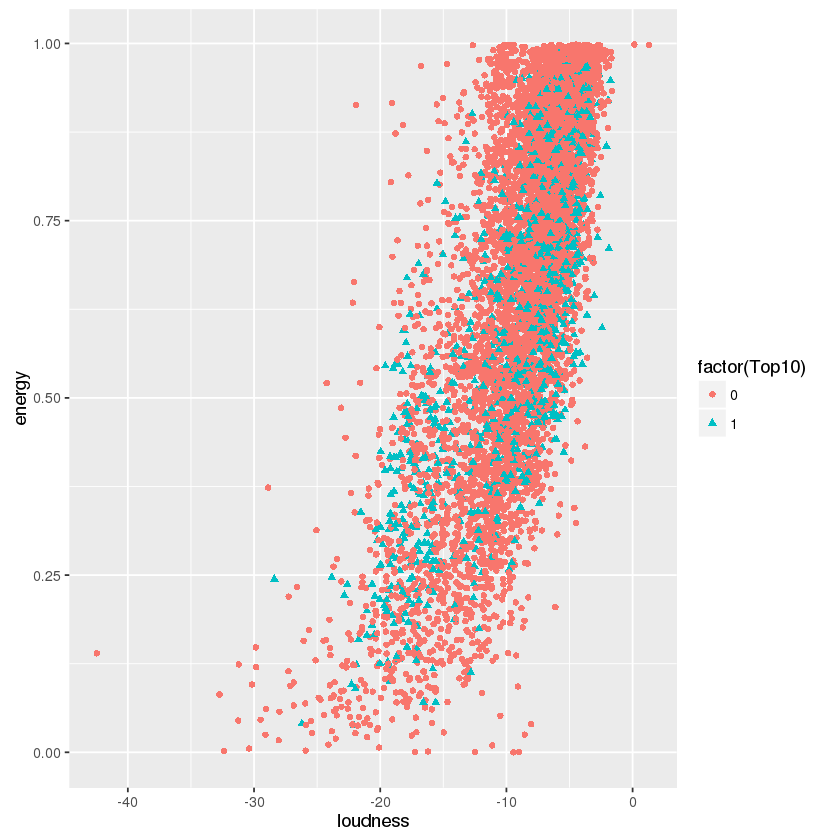

In [59]:
# Use ggplot to pLot the the variables loudness and energy of songs_traindata with Top10 supplied to color and shape parameters.
library(ggplot2)
songs_plot <- ggplot(songs_traindata, aes(loudness, energy)) + geom_point(aes(colour=factor(Top10),shape=factor(Top10))) 
songs_plot

According to above graph, there is not a clear linear boundary to separate the songs that made it to Top10 and those not.

**Activity 3: ** Fit a logistic regression model to predict Top10 using all the independent variables. Name this model songsLog1.

In [60]:
songsLog1 = glm(Top10 ~ ., data=songs_traindata, family=binomial)

In [62]:
summary(songsLog1)


Call:
glm(formula = Top10 ~ ., family = binomial, data = songs_traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9220  -0.5399  -0.3459  -0.1845   3.0770  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.470e+01  1.806e+00   8.138 4.03e-16 ***
timesignature             1.264e-01  8.674e-02   1.457 0.145050    
timesignature_confidence  7.450e-01  1.953e-01   3.815 0.000136 ***
loudness                  2.999e-01  2.917e-02  10.282  < 2e-16 ***
tempo                     3.634e-04  1.691e-03   0.215 0.829889    
tempo_confidence          4.732e-01  1.422e-01   3.329 0.000873 ***
key                       1.588e-02  1.039e-02   1.529 0.126349    
key_confidence            3.087e-01  1.412e-01   2.187 0.028760 *  
energy                   -1.502e+00  3.099e-01  -4.847 1.25e-06 ***
pitch                    -4.491e+01  6.835e+00  -6.570 5.02e-11 ***
timbre_0_min              2.316e-02  4.256e-03  

**Activity 4: ** Make predictions on the test set using songsLog1 model.

In [63]:
songsLog1.probs = predict(songsLog1,songs_testdata, type="response")

**Activity 5: ** What is the accuracy of model 'songsLog1' on the test set, using a threshold of 0.5? (Compute the accuracy as a number between 0 and 1.)

In [64]:
songsLog1.pred = rep(0,length(songsLog1.probs))
songsLog1.pred[songsLog1.probs>0.5] = 1

In [89]:
conftable = table(songsLog1.pred, songs_testdata$Top10)
conftable
length(songsLog1.pred)
print (paste("accuracy = ",sum(diag(conftable))/length(songsLog1.pred)))

              
songsLog1.pred   0   1
             0 311  48
             1   3  11

[1] 373

[1] "accuracy =  0.863270777479893"


**Activity 6**:  Calculate baseline model accuracy.

In [67]:
#As most of the outcomes are 0, the baseline model will always predict that a song is not in top10
(311+48)/(311+48+3+11)

[1] 0.9624665

### LDA and SVM

Apply LDA and SVM algorithms on glass dataset. The dependent variable in the dataset Type has 6 different classes. 

Load the glass dataset from /datasets/glass/glass.csv. Apply LDA on the dataset to determine the type of glass.

In [68]:
glass_data = read.csv("../../datasets/glass/glass.txt",header=FALSE,sep=',')
head(glass_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


In [69]:
# The data file doesn't have headers. So read the column names into a vector and add column names to the glass dataset.
header = c("Id", "Refractive_Index","Sodium","Magnesium","Aluminium","Silicon","Potassium","Calcium","Barium","Iron","Type")
names(glass_data)=header

In [70]:
head(glass_data)

Id,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


In [71]:
# Convert Type variable to factor type. 
glass_data$Type=as.factor(glass_data$Type)
str(glass_data)

'data.frame':	214 obs. of  11 variables:
 $ Id              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Refractive_Index: num  1.52 1.52 1.52 1.52 1.52 ...
 $ Sodium          : num  13.6 13.9 13.5 13.2 13.3 ...
 $ Magnesium       : num  4.49 3.6 3.55 3.69 3.62 3.61 3.6 3.61 3.58 3.6 ...
 $ Aluminium       : num  1.1 1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.36 ...
 $ Silicon         : num  71.8 72.7 73 72.6 73.1 ...
 $ Potassium       : num  0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.57 0.56 0.57 ...
 $ Calcium         : num  8.75 7.83 7.78 8.22 8.07 8.07 8.17 8.24 8.3 8.4 ...
 $ Barium          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Iron            : num  0 0 0 0 0 0.26 0 0 0 0.11 ...
 $ Type            : Factor w/ 6 levels "1","2","3","5",..: 1 1 1 1 1 1 1 1 1 1 ...


**Activity 7: ** Use ggplot to plot the variables Refrective_Index and Sodium of glass_data with Type variable supplied to color and shape parameters.

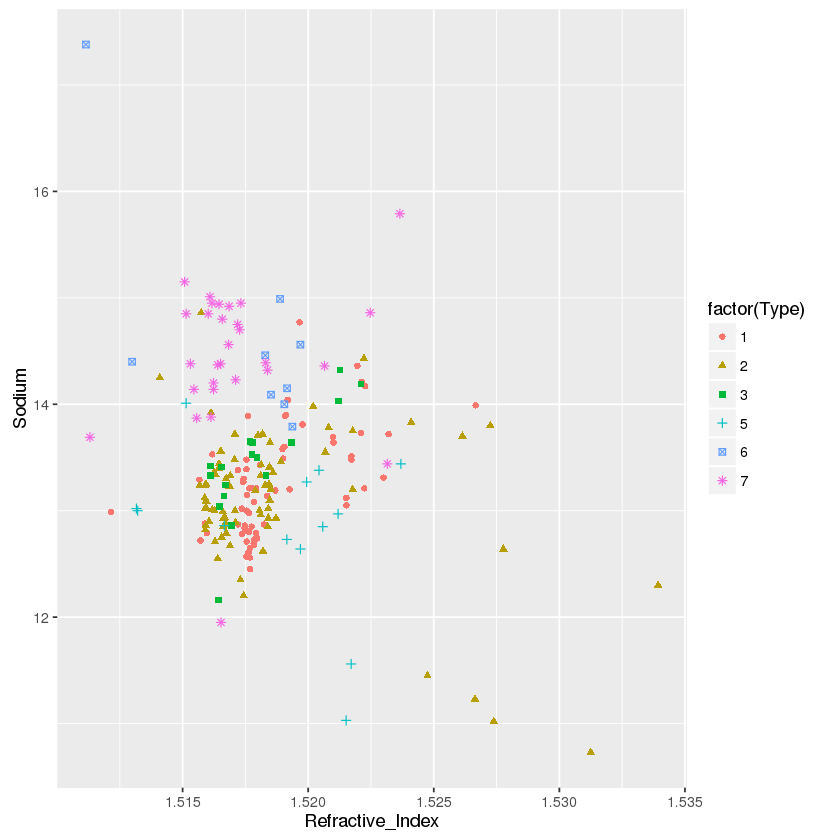

In [74]:
glass_plot = ggplot(glass_data, aes(Refractive_Index, Sodium))+ geom_point(aes(colour=factor(Type),shape=factor(Type))) 
glass_plot

**Activity 8: ** Split the glass_data into train and test subsets. glass_train_data should have 70% data and glass_test_data should have rest 30% of data. Set seed as 123.

In [130]:
# Your code for Activity 8 goes here.
library(caTools)
set.seed(123) # set.seed() will help us to reproduce the results.
split = sample.split(glass_data$Refractive_Index, SplitRatio=0.7) 
# Train data will have the rest 70% of data
glass_train_data  = subset(glass_data, split == TRUE,select = -c(Id))
# Test data will have the rest 30% of data
glass_test_data  = subset(glass_data, split == TRUE,select = -c(Id))

**Activity 9: ** Fit a Linear Discriminant Analysis model on glass_train_data using all independent variables except Id to predict Type variable. Name this model glass_lda_fit.

In [131]:
#I have removed Id column in the subset function in previous step
library(MASS)
glass_lda_fit = lda(Type ~ ., data=glass_train_data)

In [132]:
# <lda_model>$count will give the counts for each class in the data
glass_lda_fit$count

1  2  3  5  6  7 
45 52 15  9  6 22

In [133]:
# the singular values (svd) gives the ratio of the between and within-group standard deviations of the linear 
# discriminant variables.
glass_lda_fit$svd

[1] 12.557158  4.954924  2.963069  2.019372  1.350571

In [134]:
# normalized proportions.
prop = glass_lda_fit$svd^2/sum(glass_lda_fit$svd^2)
prop
# Based on values displayed below, 1st LDA can explain more than 79% percent of between-group variance in this dataset.

[1] 0.800762153 0.124679426 0.044586599 0.020708736 0.009263086

**Activity 10: ** Predict the glass type in glass_test_data using the model glass_lda_fit built above.

In [121]:
# Your code for Activity 10 goes here.
pred <- predict(glass_lda_fit,glass_test_data)

**Activity 11: ** Calculate the accuracy of the model using the confusion matrix. 

In [122]:
conftable1 <- table(pred$class, glass_test_data$Type)
conftable1

   
     1  2  3  5  6  7
  1 32  8 10  0  1  1
  2 11 40  3  2  2  1
  3  2  0  2  0  0  0
  5  0  2  0  6  0  0
  6  0  2  0  0  3  0
  7  0  0  0  1  0 20

In [123]:
paste('accuracy:',mean(pred$class == glass_test_data$Type))

[1] "accuracy: 0.691275167785235"

LDA did not do a decent job in classifying glass types. Apply SVM on the same data to see if there would be any improvement in the classification accuracy.

**Activity 12: ** Fit a SVM model on glass_train_data using all independent variables except Id to predict Type variable. Name this model glass_svm_fit. Make sure to use a nonlinear kernel.

In [147]:
# Your code for Activity 12 goes here.
# tuned gamma for better accuracy.
library("e1071")
glass_svm_fit = svm(Type ~ ., data=glass_train_data, kernel="radial",gamma = 2)
summary(glass_svm_fit)


Call:
svm(formula = Type ~ ., data = glass_train_data, kernel = "radial", 
    gamma = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  2 

Number of Support Vectors:  136

 ( 39 47 15 9 6 20 )


Number of Classes:  6 

Levels: 
 1 2 3 5 6 7




**Activity 13: ** Predict the glass type in glass_test_data using the SVM model glass_svm_fit built above. Use the confusionmatrix function of caret package to find the accuracy of the model.

In [148]:
# Your code for Activity 13 goes here.
library(caret)
pred2=predict(glass_svm_fit, glass_test_data)
conftable2=table(predict=pred2, class=glass_test_data$Type)
conftable2

       class
predict  1  2  3  5  6  7
      1 41  2  6  0  0  0
      2  3 50  0  0  0  0
      3  1  0  9  0  0  0
      5  0  0  0  9  0  0
      6  0  0  0  0  6  0
      7  0  0  0  0  0 22

In [149]:
paste('accuracy:',mean(pred2 == glass_test_data$Type))

[1] "accuracy: 0.919463087248322"